In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn



In [61]:
from sklearn import svm
from sklearn.metrics import f1_score,jaccard_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
data=pd.read_csv("cars_data_No_missing_values.csv")
data.head()

,Unnamed: 0,mark_model,Year,Location,Kilométrage,Puissance_fiscale,Nombre_de_portes,Première_main,Couleur,Carrosserie,...,Anti_brouillard,Affichage_tête_haute,Suspension_sport,Frein_de_parking_automatique,Diesel_Power,Electrique_Power,Essence_Power,Hybride_Power,Automatique,Manuelle
0,0,PEUGEOT 203,1956.0,Casablanca,262723.131068,7.0,5.0,0.0,Rouge fonce,Compact,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,PEUGEOT 206,2002.0,Chefchaouen,300000.000000,7.0,5.0,0.0,Noir,Citadine,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,ALFA-ROMEO 159,2007.0,El jadida,137000.000000,11.0,5.0,0.0,Noir,Berline,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,3,NISSAN Micra,2021.0,Casablanca,70000.000000,6.0,5.0,1.0,Bordeaux,Citadine,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,HYUNDAI Santa fe,2016.0,Casablanca,155000.000000,9.0,5.0,1.0,Noir,Suv et 4x4,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


## Data pre-processing

In [42]:
data=data[[ 'Year','Kilométrage',
       'Puissance_fiscale', 'Nombre_de_portes',
       'Price', 'Dvd_cd_mp3', 'Jantes_aluminium', 'Airbags',
       'Climatisation_auto', 'Abs', 'Vitres_éléctriques', 'Esp',
       'Intérieur_cuir', 'Ordinateur_de_bord', 'Alarme', 'Aide_parking',
       'Système_de_navigation_gps', 'Anti_patinage', 'Projecteurs_xenon',
       'Rétroviseur_extérieur_électrique', 'Toit_ouvrant', 'Siége_electrique',
       'Siège_chauffant', 'Siége_sport', 'Volant_reglable', 'Anti_démarrage',
       'Volant_sport', 'Contrôle_de_pression_des_pneus', 'Détecteur_de_pluie',
       'Climatisation_multizone', 'Keyless_go', 'Radio_commande_au_volant',
       'Régulateur_de_vitesse', 'Anti_brouillard', 'Affichage_tête_haute',
       'Suspension_sport', 'Frein_de_parking_automatique', 'Diesel_Power',
       'Electrique_Power', 'Essence_Power', 'Hybride_Power', 'Automatique',
       'Manuelle', 'Première_main']]

In [43]:
data.head()

,Year,Kilométrage,Puissance_fiscale,Nombre_de_portes,Price,Dvd_cd_mp3,Jantes_aluminium,Airbags,Climatisation_auto,Abs,...,Affichage_tête_haute,Suspension_sport,Frein_de_parking_automatique,Diesel_Power,Electrique_Power,Essence_Power,Hybride_Power,Automatique,Manuelle,Première_main
0,1956.0,262723.131068,7.0,5.0,130000.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2002.0,300000.000000,7.0,5.0,45000.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2007.0,137000.000000,11.0,5.0,57000.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2021.0,70000.000000,6.0,5.0,158000.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,2016.0,155000.000000,9.0,5.0,225000.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [55]:
x_data=np.asarray(data.drop(columns=["Première_main"]))
x_data=StandardScaler().fit(x_data).transform(x_data)
x_data

array([[-7.99531654e+00, -1.94171356e-03, -2.31192181e-01, ...,
        -4.71473715e-02, -6.03199051e-01,  6.03199051e-01],
       [-1.27734872e+00,  7.01168367e-04, -2.31192181e-01, ...,
        -4.71473715e-02, -6.03199051e-01,  6.03199051e-01],
       [-5.47134823e-01, -1.08553214e-02,  1.42833571e+00, ...,
        -4.71473715e-02, -6.03199051e-01,  6.03199051e-01],
       ...,
       [-2.55049265e-01, -7.81873531e-06,  1.84321768e+00, ...,
        -4.71473715e-02,  1.65782754e+00, -1.65782754e+00],
       [ 3.29121850e-01, -1.14225111e-02,  1.83689792e-01, ...,
        -4.71473715e-02, -6.03199051e-01,  6.03199051e-01],
       [ 6.21207408e-01, -1.94171356e-03,  1.83689792e-01, ...,
        -4.71473715e-02,  1.65782754e+00, -1.65782754e+00]])

In [51]:
y_data=np.asanyarray(data["Première_main"].astype(int))
y_data[:5]

array([0, 0, 0, 1, 1])

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=3)
print("x_train",x_train.shape,"x_test",x_test.shape,"y_train",y_train.shape,"y_test",y_test.shape)

x_train (16727, 43) x_test (7169, 43) y_train (16727,) y_test (7169,)


In [108]:
kernels={'linear', 'poly', 'rbf', 'sigmoid'}

for kernel in kernels:
    svm1=svm.SVC(kernel=kernel)
    svm1.fit(x_data,y_data)
    yhat=svm1.predict(x_test)
    F1S=f1_score(yhat,y_test,average='weighted')
    JS=jaccard_score(yhat,y_test,pos_label=0)#,average='weighted')
    print(f'for {kernel} kernel:','f1_score=',round(F1S,2),'and jaccard_score=',round(JS,2))

for sigmoid kernel: f1_score= 0.66 and jaccard_score= 0.59
for linear kernel: f1_score= 0.73 and jaccard_score= 0.66
for poly kernel: f1_score= 0.74 and jaccard_score= 0.65
for rbf kernel: f1_score= 0.74 and jaccard_score= 0.67


for linear kernel: f1_score= 3 and jaccard_score= 8


In [79]:
import itertools

In [99]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.73      0.89      0.80      4557
           1       0.68      0.42      0.52      2612

    accuracy                           0.72      7169
   macro avg       0.71      0.65      0.66      7169
weighted avg       0.71      0.72      0.70      7169

Confusion matrix, without normalization
[[4057  500]
 [1526 1086]]


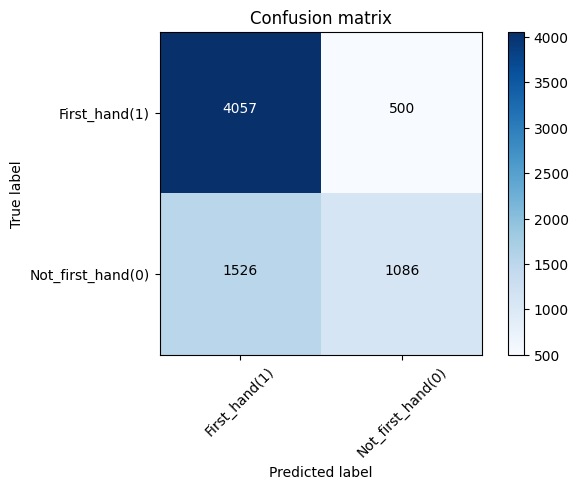

In [100]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['First_hand(1)','Not_first_hand(0)'],normalize= False,  title='Confusion matrix')

In [84]:
from sklearn.metrics import log_loss

In [101]:
#ypred=svm1.predict_proba(y_test)
# svm cant predict the probability
log_loss(yhat,y_test)

10.186140572792766